# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [ ]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

d = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

In [ ]:
from selenium.webdriver.common.by import By
import time
import pandas as pd


url = 'https://www.imdb.com/title/tt9376612/reviews/?ref_=tt_ql_urv'
t1 = []
r1 = []
d.get(url)
for i in range(4):
    d.find_element(By.ID, "load-more-trigger").click()
    time.sleep(5)
    lst_title = d.find_elements(By.CLASS_NAME, "title")
    lst_reviews = d.find_elements(By.CLASS_NAME, "text")
for j,k in zip(lst_title, lst_reviews):
    t1.append((j.text).replace('\n',''))
    r1.append(k.text)
df = pd.DataFrame(list(zip(t1, r1)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(df)))
df

Length of data frame is 125


,Title,Review
0,Sort of disappointed..,I got to admit I wasn't particularly blown awa...
1,Surprisingly good,I'll be honest - Marvel movies are not in my t...
2,Worth a watch with family,RATED 8/10 Language: English Source: Hotstar R...
3,A visual feast.,
4,Questionable script (and Awkwafina is just the...,The characters are a bit incoherent and straig...
...,...,...
120,Screen play 😲😲,
121,Marvel with a twist,
122,A good skeleton with too much fat,I'll make this very brief:\n\nIf it wasn't for...
123,Shang-chi,"I loved the movie , it is awesome , in fact i'..."


In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Data cleaning

### Converting to Lower Case

In [ ]:
df['Lower Case'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### Removal of Punctuation

In [ ]:
df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')

/tmp/ipykernel_43055/1083584843.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Removal of Punctuation'] = df['Lower Case'].str.replace('[^\w\s]','')


### Removal of Special Characters

In [ ]:
import re
df['Removal of Special Characters'] = df['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))


### Removal of Stop words

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Stopwords Removal'] = df['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

### Spelling Correction

In [ ]:
from textblob import TextBlob
df['Spelling Correction'] = df['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))

### Tokenization

In [ ]:
import nltk
nltk.download('punkt')
df['Tokenization'] = df['Spelling Correction'].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/joelnyongesa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Stemming

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['After Stemming'] = df['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

### Lemmatization

In [ ]:
from textblob import Word
import nltk
nltk.download('wordnet')

df['After Lemmatization'] = df['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.to_csv('reviwes.csv',index=False)

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/joelnyongesa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 1.1 - Trigrams

In [ ]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in df['After Lemmatization']:
  words_sentence.append(word_tokenize(sentence))
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))

In [ ]:

tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('legend', 'ten', 'ring'): 13, ('shangchi', 'legend', 'ten'): 12, ('marvel', 'cinemat', 'univers'): 5, ('situ', 'lie', 'shangchi'): 4, ('crouch', 'tiger', 'hidden'): 4, ('one', 'best', 'marvel'): 4, ('best', 'marvel', 'move'): 4, ('like', 'marvel', 'movi'): 3, ('destini', 'daniel', 'cotton'): 3, ('martial', 'art', 'marvel'): 3, ...})

### 1.2 - Probability of Bi grams

In [ ]:
from collections import Counter
bi_grams = nltk.bigrams(iterations)
frequency_dist = nltk.FreqDist(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
  print( str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))

('got', 'admit'):0.05555555555555555
('admit', 'want'):0.25
('want', 'particularli'):0.043478260869565216
('particularli', 'blown'):0.3333333333333333
('blown', 'away'):0.6666666666666666
('away', 'anyth'):0.1111111111111111
('anyth', 'movi'):0.16666666666666666
('movi', 'might'):0.005076142131979695
('might', 'even'):0.2
('even', 'say'):0.037037037037037035
('say', 'bore'):0.07142857142857142
('bore', 'dont'):0.06666666666666667
('dont', 'get'):0.16666666666666666
('get', 'wrong'):0.06896551724137931
('wrong', 'spectacl'):0.3333333333333333
('spectacl', 'action'):0.3333333333333333
('action', 'great'):0.02127659574468085
('great', 'locat'):0.02
('locat', 'nice'):1.0
('nice', 'costum'):0.0625
('costum', 'design'):1.0
('design', 'sound'):0.5
('sound', 'design'):0.2
('design', 'etc'):0.5
('etc', 'overal'):0.3333333333333333
('overal', 'soft'):0.1
('soft', 'releas'):0.5
('releas', 'worth'):0.16666666666666666
('worth', 'see'):0.2
('see', 'theater'):0.08333333333333333
('theater', 'special

('focus', 'martial'):0.5
('art', 'marvel'):0.125
('marvel', 'superpow'):0.00980392156862745
('superpow', 'thing'):1.0
('thing', 'love'):0.047619047619047616
('love', 'see'):0.1
('see', 'mix'):0.027777777777777776
('mix', 'marvel'):0.125
('marvel', 'masterlevelcgi'):0.00980392156862745
('masterlevelcgi', 'martial'):1.0
('art', 'kungfu'):0.041666666666666664
('kungfu', 'kind'):0.3333333333333333
('kind', 'visual'):0.16666666666666666
('effect', 'marvel'):0.043478260869565216
('marvel', 'fail'):0.00980392156862745
('fail', 'give'):0.5
('give', 'alway'):0.05555555555555555
('alway', 'love'):0.16666666666666666
('love', 'marvel'):0.06666666666666667
('marvel', 'cast'):0.00980392156862745
('cast', 'kate'):0.07142857142857142
('kate', 'perfect'):0.09090909090909091
('perfect', 'role'):0.25
('role', 'love'):0.1111111111111111
('love', 'chemistri'):0.03333333333333333
('chemistri', 'shan'):0.5
('shan', 'also'):0.2
('also', 'laugh'):0.03571428571428571
('laugh', 'loud'):0.1111111111111111
('loud

('desol', 'derbi'):1.0
('derbi', 'err'):1.0
('err', 'laocoon'):1.0
('laocoon', 'began'):1.0
('began', 'feel'):1.0
('feel', 'home'):0.04
('home', 'pretti'):0.5
('pretti', 'dark'):0.07142857142857142
('dark', 'quick'):0.5
('quick', '2'):0.5
('2', 'one'):0.09090909090909091
('one', 'stark'):0.017857142857142856
('stark', 'downsid'):0.5
('downsid', 'ala'):0.5
('ala', 'you'):1.0
('you', 'way'):0.024390243902439025
('way', 'much'):0.07692307692307693
('much', 'muddl'):0.027777777777777776
('muddl', 'obfuscatori'):0.5
('obfuscatori', 'essay'):1.0
('essay', 'visavi'):1.0
('visavi', 'ten'):1.0
('ring', 'year'):0.034482758620689655
('year', '2008'):0.05
('2008', 'superb'):0.5
('superb', 'receiv'):0.3333333333333333
('receiv', 'complet'):0.5
('complet', 'iron'):0.125
('iron', 'roman'):0.14285714285714285
('roman', 'introduc'):0.5
('introduc', 'spoke'):0.25
('spoke', 'milit'):0.5
('milit', 'organ'):0.5
('organ', 'tar'):0.25
('tar', 'short'):0.5
('short', 'first'):0.2
('first', 'time'):0.0909090909

('famili', 'x'):0.14285714285714285
('went', 'play'):0.06666666666666667
('play', 'toni'):0.25
('lung', 'good'):0.0625
('good', 'villain'):0.028985507246376812
('villain', 'understand'):0.043478260869565216
('understand', 'sympath'):0.125
('sympath', 'although'):1.0
('although', 'know'):0.125
('know', 'way'):0.07142857142857142
('way', 'act'):0.02564102564102564
('act', 'wrong'):0.038461538461538464
('wrong', 'understand'):0.3333333333333333
('understand', 'pain'):0.125
('pain', 'besid'):1.0
('besid', 'villain'):1.0
('villain', 'also'):0.043478260869565216
('also', 'father'):0.03571428571428571
('father', 'everyth'):0.05263157894736842
('everyth', 'want'):0.1111111111111111
('want', 'releas'):0.043478260869565216
('wife', 'good'):0.2
('villain', 'certainli'):0.043478260869565216
('certainli', 'one'):0.16666666666666666
('best', 'villain'):0.02702702702702703
('villain', 'year'):0.043478260869565216
('year', 'movi'):0.1
('movi', 'blow'):0.005076142131979695
('blow', 'away'):1.0
('away',

('joke', 'background'):0.16666666666666666
('score', 'everyth'):0.16666666666666666
('point', 'accord'):0.1
('accord', 'stori'):1.0
('stori', 'scene'):0.013888888888888888
('scene', 'actor'):0.017241379310344827
('actor', 'action'):0.0625
('scene', 'hand'):0.017241379310344827
('hand', 'hand'):0.2222222222222222
('hand', 'combat'):0.2222222222222222
('combat', 'anoth'):0.25
('level', 'far'):0.2
('marvel', 'fantasi'):0.00980392156862745
('fantasi', 'film'):0.125
('film', 'gener'):0.01694915254237288
('gener', 'like'):0.16666666666666666
('like', 'ground'):0.014492753623188406
('ground', 'realiti'):0.3333333333333333
('realiti', 'histori'):0.5
('histori', 'world'):0.25
('world', 'current'):0.1111111111111111
('current', 'set'):0.5
('set', 'one'):0.16666666666666666
('one', 'realli'):0.03571428571428571
('realli', 'realli'):0.027777777777777776
('realli', 'go'):0.027777777777777776
('go', 'fantasi'):0.041666666666666664
('fantasi', 'set'):0.125
('set', 'parallel'):0.16666666666666666
('pa

('mean', 'top'):0.1
('top', 'tier'):0.14285714285714285
('tier', 'move'):1.0
('move', 'realm'):0.022727272727272728
('realm', 'black'):0.25
('anoth', 'thou'):0.041666666666666664
('thou', '3'):0.5
('3', 'got'):0.125
('got', 'infin'):0.05555555555555555
('war', 'spiderman'):0.14285714285714285
('spiderman', 'name'):0.5
('name', 'major'):0.5
('major', 'comic'):0.25
('comic', 'run'):0.09090909090909091
('run', 'come'):0.2
('come', 'screen'):0.05
('screen', 'jaw'):0.058823529411764705
('jaw', 'drop'):1.0
('drop', 'movi'):0.3333333333333333
('movi', 'show'):0.005076142131979695
('show', 'noth'):0.08333333333333333
('noth', 'pure'):0.125
('pure', 'joy'):0.2
('joy', 'cultur'):1.0
('cultur', 'mystic'):0.0625
('mystic', 'folklor'):0.25
('folklor', 'mix'):1.0
('mix', 'pastpres'):0.125
('pastpres', 'let'):1.0
('let', 'forget'):0.2
('forget', 'secret'):0.5
('secret', 'garden'):1.0
('garden', 'film'):1.0
('film', 'expand'):0.01694915254237288
('univers', 'even'):0.05263157894736842
('even', 'deeper

('total', 'unpopular'):0.25
('unpopular', 'opinion'):1.0
('opinion', 'might'):0.3333333333333333
('might', 'one'):0.2
('realli', 'didn'):0.027777777777777776
('didn', 'like'):0.15384615384615385
('like', 'even'):0.014492753623188406
('even', 'go'):0.037037037037037035
('go', 'expect'):0.041666666666666664
('expect', 'want'):0.07692307692307693
('want', 'keen'):0.043478260869565216
('keen', 'movi'):1.0
('movi', 'first'):0.005076142131979695
('first', 'place'):0.09090909090909091
('place', 'sway'):0.3333333333333333
('sway', 'everybodi'):1.0
('everybodi', 'watch'):0.3333333333333333
('watch', 'said'):0.020833333333333332
('said', 'brilliant'):0.2
('brilliant', 'mistak'):0.3333333333333333
('mistak', 'felt'):0.5
('felt', 'movi'):0.05263157894736842
('movi', 'incred'):0.005076142131979695
('incred', 'dull'):0.16666666666666666
('dull', 'genet'):1.0
('genet', 'utterli'):0.2
('utterli', 'click'):1.0
('click', 'stereotyp'):0.25
('stereotyp', 'cap'):0.5
('cap', 'charact'):1.0
('charact', 'form

('entertain', 'everi'):0.09090909090909091
('everi', 'promo'):0.058823529411764705
('promo', 'interview'):1.0
('interview', 'actor'):1.0
('actor', 'involv'):0.0625
('involv', 'someth'):0.14285714285714285
('someth', 'mention'):0.0625
('mention', 'good'):0.25
('good', 'good'):0.014492753623188406
('good', 'u'):0.014492753623188406
('u', 'made'):0.06666666666666667
('made', 'bit'):0.05555555555555555
('bit', 'base'):0.058823529411764705
('base', 'come'):0.2
('come', 'you'):0.05
('you', 'get'):0.024390243902439025
('get', 'pure'):0.034482758620689655
('pure', 'theatric'):0.2
('theatric', 'releas'):0.5
('releas', 'instead'):0.16666666666666666
('instead', 'black'):0.16666666666666666
('widow', 'treatment'):0.25
('treatment', 'also'):0.5
('also', 'avail'):0.03571428571428571
('avail', 'dinner'):0.3333333333333333
('dinner', 'plu'):0.2222222222222222
('plu', 'cinema'):0.25
('cinema', 'time'):0.09090909090909091
('time', 'issu'):0.029411764705882353
('issu', 'come'):0.25
('come', 'watch'):0.0

('scene', 'usual'):0.017241379310344827
('stun', 'great'):0.1111111111111111
('great', 'act'):0.04
('act', 'great'):0.07692307692307693
('stori', 'highli'):0.013888888888888888
('highli', 'recommend'):1.0
('recommend', 'good'):0.14285714285714285
('fan', 'king'):0.06666666666666667
('ff', 'didn'):0.1111111111111111
('didn', 'realli'):0.07692307692307693
('realli', 'want'):0.027777777777777776
('see', '2'):0.027777777777777776
('2', 'year'):0.09090909090909091
('year', 'came'):0.05
('came', 'watch'):0.125
('glad', 'marvel'):0.2
('marvel', 'silli'):0.0196078431372549
('silli', 'movi'):0.2
('come', 'noth'):0.05
('noth', 'shangchi'):0.125
('shangchi', 'spent'):0.016666666666666666
('spent', 'life'):1.0
('life', 'train'):0.16666666666666666
('train', 'killer'):0.14285714285714285
('killer', 'scar'):0.5
('scar', 'dad'):1.0
('dad', 'ran'):1.0
('ran', 'away'):0.3333333333333333
('away', '15'):0.1111111111111111
('15', 'live'):0.5
('live', 'low'):0.14285714285714285
('low', 'life'):0.2
('life',

('overal', 'good'):0.1
('movi', 'enjoy'):0.005076142131979695
('enjoy', 'watch'):0.07142857142857142
('watch', 'one'):0.020833333333333332
('move', 'solid'):0.022727272727272728
('solid', 'one'):0.14285714285714285
('one', 'worth'):0.017857142857142856
('theater', 'film'):0.16666666666666666
('film', 'manag'):0.01694915254237288
('manag', 'introduc'):0.3333333333333333
('introduc', 'charact'):0.25
('charact', 'univers'):0.014925373134328358
('univers', 'stori'):0.05263157894736842
('stori', 'unfold'):0.013888888888888888
('unfold', 'bore'):1.0
('bore', 'conflict'):0.06666666666666667
('conflict', 'chang'):0.3333333333333333
('chang', 'sever'):0.5
('sever', 'time'):0.25
('time', 'even'):0.029411764705882353
('even', 'take'):0.037037037037037035
('take', 'main'):0.08333333333333333
('charact', 'lake'):0.014925373134328358
('lake', 'concentr'):1.0
('concentr', 'someth'):1.0
('el', 'becom'):0.14285714285714285
('becom', 'cyclic'):0.07142857142857142
('cyclic', 'incongru'):1.0
('incongru', 

### 1.3 Noun Phrases and relative probabilities of each review in terms of other reviews

In [ ]:
whole_dataset = ''
index = []
i = 1
for line in df['After Lemmatization']:
  whole_dataset = whole_dataset + line
  value = 'Review-' + str(i)
  index.append(value)
  i += 1

In [ ]:
from textblob import TextBlob
noun_phrases = []
frequency = []
for line in df['After Lemmatization']:
  blob = TextBlob(line)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for word in noun_phrases:
  noun_phrases_freq = []
  for line in df['After Lemmatization']:
    noun_phrases_freq.append(line.count(word) / whole_dataset.count(word))
  frequency.append(noun_phrases_freq)
noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = index
noun_phrases_df

,particularli blown,anyth movi,bore dont,wrong spectacl action,great locat,nice costum design,sound design etc overal,soft releas worth,problem underwritten lead muddl person reason,stori devoid charm person good dialogu,...,recent swallow string,light conflict hero wisecrack,comic relief sidekick aw aquafina,aw ben dingley,giant mile,varieti glow weapon blood hyperkinet hyperimplaus carmotorcycl case lot click wisecrack toughguy dialogu power,heroic vogu,vener threepoint power landingslid number time novel thing film,mytholog beast chine cultur otherwis overli,aquafina deriv repetit ultim bore entri bloat jeun milki mousemarvel superhero franchis
Review-1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review-121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

### 2.1 - TF-IDF

In [ ]:
# Write your code here
import math
def tf_idf_value(sentence,word):
  size = len(sentence.split(" "))
  tf_value = sentence.count(word)/size
  idf_value = 0
  if(tf_value!=0):
    idf_value = math.log(size)/sentence.count(word)
  else:
    return 0;
  return tf_value*idf_value

sentences = df["Spelling Correction"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list,columns=["token"])
count = 0
for i in sentences:
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
  count+=1

tf_idf

/tmp/ipykernel_43055/1811015305.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
/tmp/ipykernel_43055/1811015305.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
/tmp/ipykernel_43055/1811015305.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

,token,0,1,2,3,4,5,6,7,8,...,115,116,117,118,119,120,121,122,123,124
0,,0.036335,0.048738,0.088992,0.0,0.057567,0.0,0.116114,0.036335,0.060038,...,0.207076,0.0,0.108304,0.034322,0.160576,0.0,0.0,0.056413,0.097592,0.038873
1,tailor,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,strongly,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.097592,0.000000
3,fiery,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,ended,0.000000,0.000000,0.088992,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,section,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2258,packs,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2259,babel,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2260,stronger,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.036335,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


### 2.2 - Ranking using Cosine Similarity

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
query_sentence = 'The perfect portrait of a decline to insanity" & Joaquin Phoenix portrays this flawlessly in a performance of a lifetime. Choreographed impeccably by Todd Phillips & is nothing short of breathtaking. The cinematography & backdrop ideology of such an original film for such a complex character is only complimented by the superb soundtrack & acting. A hauntingly beautiful film & A Definate 10/10. Edit: Bring on part 2 plssssss!. We all want it!.'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english')
X_set = {w for w in X_list if not w in sw}

In [ ]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector:
      if w in X_set: l1.append(1)
      else: l1.append(0)
      if w in Y_set: l2.append(1)
      else: l2.append(0)
  return rvector, l1, l2


In [ ]:

def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)):
        c+= l1[i]*l2[i]
  cosine = c / float((sum(l1)*sum(l2))**0.5)
  return cosine

In [ ]:
similarity_list = []
for sentence in df['Spelling Correction']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['Review'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,I got to admit I wasn't particularly blown awa...,0.02774
1,I'll be honest - Marvel movies are not in my t...,0.0
2,RATED 8/10 Language: English Source: Hotstar R...,0.0
3,,None
4,The characters are a bit incoherent and straig...,0.052868
...,...,...
120,,None
121,,None
122,I'll make this very brief:\n\nIf it wasn't for...,0.037756
123,"I loved the movie , it is awesome , in fact i'...",0.025666


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
# Write your code here
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ast


In [ ]:
df = pd.read_csv('reviwes.csv')

In [ ]:
tokenized_texts = df['Tokenization'].dropna().apply(ast.literal_eval)

In [ ]:
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=300, window=5, min_count=1, workers=4)

In [ ]:
def visualize_embeddings(model, words=None, sample=100):
    if words is None:
        words = model.wv.index_to_key[:sample]

    word_vectors = model.wv[words]

    pca = PCA(n_components=2)
    result = pca.fit_transform(word_vectors)

    plt.figure(figsize=(10, 10))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()

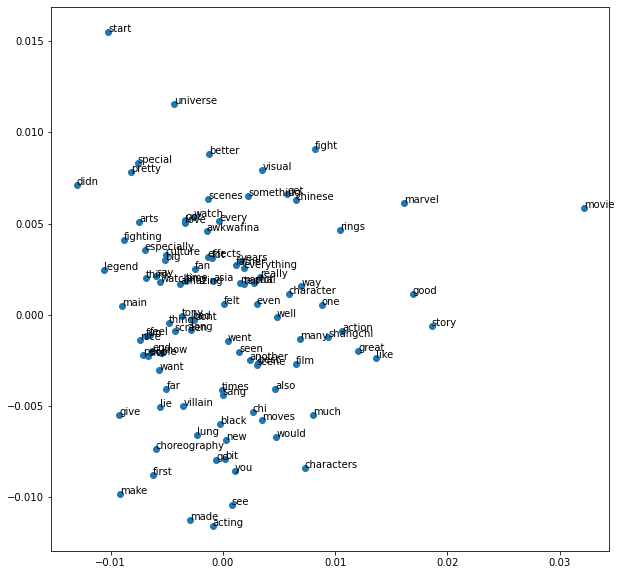

In [ ]:
visualize_embeddings(word2vec_model)

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [1]:
# Type your answer
''' Enjoyed crafting a word embedding model from scratch. Challenge was reviewing the reviews (sentiments)'''



' Enjoyed crafting a word embedding model from scratch. Challenge was reviewing the reviews (sentiments)'